In [3]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "google-playstore-apps"

# Definición de un proyecto de Analítica Descriptiva:

### 1) Problema a resolver

A día de hoy al graduarse de una universidad y querer dedicarse al mundo de desarrollo de aplicaciones móviles, suele ser complicado elegir que tipo de aplicación queremos desarrollar, hacia que público va dirigido y que fáctores son importantes al momento de desarrollar una aplicación movil

### 2) Objetivos
-Analizar el dataset Google-Playstore para observar que factores son importantes a modo de receta para que una aplicacion nueva lanzada tenga mayor probabilidad de exito, segun los costos de aplicacion, el rating, el numero de descargas, categoria,version de android, hacia que publico va dirigido,peso de la aplicacion etc.


-Desmostrar que los datos de las aplicaciones de Play Store tienen un enorme potencial para impulsar al éxito a las empresas de creación de aplicaciones. Se pueden extraer conocimientos prácticos para que los desarrolladores trabajen y capturen el mercado de Android.

### 3) Datos:
#### a. Fuente de datos:
    La fuente de datos es el dataset Google-Playstore.csv que se puede encontrar en el siguiente enlace 
    https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps
#### b. Tipos de datos:
El dataset contiene datos de mas 600K aplicaciones con los siguientes atributos:

 - App Name: string
 - App Id: string
 - Category: String
 - Rating: Number
 - Rating Count: Number
 - Installs : string
 - Minimum Installs: Number
 - Maximum Installs: Number
 - Free :String
 - Price: Number
 - Currency: String
 - Size: String
 - Minimum Android: String
 - Developer Id: String
 - Developer Website: String
 - Developer Email: String
 - Released: String
 - Privacy Policy: String
 - Last Updated: String
 - Content Rating: String
 - Ad Supported: String
 - In app purchases: String
 - Editor Choice: String
#### c. Procesamiento:


In [4]:
data <- read.csv("/kaggle/input/google-playstore-apps/Google-Playstore.csv")
head(data)

,App.Name,App.Id,Category,Rating,Rating.Count,Installs,Minimum.Installs,Maximum.Installs,Free,Price,⋯,Developer.Website,Developer.Email,Released,Last.Updated,Content.Rating,Privacy.Policy,Ad.Supported,In.App.Purchases,Editors.Choice,Scraped.Time
,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0,10+,10,15,True,0,⋯,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
2,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64,"5,000+",5000,7662,True,0,⋯,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
3,Vibook,com.doantiepvien.crm,Productivity,0.0,0,50+,50,58,True,0,⋯,,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-and-conditions/privacy-policy,False,False,False,2021-06-15 20:19:35
4,Smart City Trichy Public Service Vehicles 17UCS548,cst.stJoseph.ug17ucs548,Communication,5.0,5,10+,10,19,True,0,⋯,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,,True,False,False,2021-06-15 20:19:35
5,GROW.me,com.horodyski.grower,Tools,0.0,0,100+,100,478,True,0,⋯,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
6,IMOCCI,com.imocci,Social,0.0,0,50+,50,89,True,0,⋯,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018/08/Datenschutzerklärung_IMOCCI_22072018.pdf,False,True,False,2021-06-15 20:19:35


In [5]:
# Print column types of a dataframe
str(data)

'data.frame':	2312944 obs. of  24 variables:
 $ App.Name         : chr  "Gakondo" "Ampere Battery Info" "Vibook" "Smart City Trichy Public Service Vehicles 17UCS548" ...
 $ App.Id           : chr  "com.ishakwe.gakondo" "com.webserveis.batteryinfo" "com.doantiepvien.crm" "cst.stJoseph.ug17ucs548" ...
 $ Category         : chr  "Adventure" "Tools" "Productivity" "Communication" ...
 $ Rating           : num  0 4.4 0 5 0 0 4.5 2 0 4.7 ...
 $ Rating.Count     : int  0 64 0 5 0 0 12 39 0 820 ...
 $ Installs         : chr  "10+" "5,000+" "50+" "10+" ...
 $ Minimum.Installs : num  10 5000 50 10 100 50 1000 500 10 50000 ...
 $ Maximum.Installs : num  15 7662 58 19 478 ...
 $ Free             : chr  "True" "True" "True" "True" ...
 $ Price            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Currency         : chr  "USD" "USD" "USD" "USD" ...
 $ Size             : chr  "10M" "2.9M" "3.7M" "1.8M" ...
 $ Minimum.Android  : chr  "7.1 and up" "5.0 and up" "4.0.3 and up" "4.0.3 and up" ...
 $ Developer.Id  

#### Preprocessing

In [6]:
# Check if dataset contains missing values
if (any(is.na(data))) {
  print("Dataset contains missing values.")
} else {
  print("Dataset does not contain missing values.")
}

[1] "Dataset contains missing values."


In [7]:
# Count empty or NA values in each column
na_counts <- colSums(is.na(data))

# Display the counts
print(na_counts)

         App.Name            App.Id          Category            Rating 
                1                 0                 0             22883 
     Rating.Count          Installs  Minimum.Installs  Maximum.Installs 
            22883                 0               107                 0 
             Free             Price          Currency              Size 
                0                 0                 0                 0 
  Minimum.Android      Developer.Id Developer.Website   Developer.Email 
                0                 0                 0                 0 
         Released      Last.Updated    Content.Rating    Privacy.Policy 
                0                 0                 0                 0 
     Ad.Supported  In.App.Purchases    Editors.Choice      Scraped.Time 
                0                 0                 0                 0 


In [8]:
# Find columns with missing values
columns_with_missing <- colnames(data)[colSums(is.na(data)) > 0]

# Print the columns with missing values
print(columns_with_missing)

[1] "App.Name"         "Rating"           "Rating.Count"     "Minimum.Installs"


In [31]:
#Create copy to modify data
dataset <- data

# Remove rows with missing values in App.Name column
dataset <- dataset[complete.cases(dataset$App.Name), ]

# Calculate the mean of the Rating column (excluding missing values)
rating_mean <- mean(dataset$Rating, na.rm = TRUE)

# Replace missing values in Rating with the mean
dataset$Rating[is.na(dataset$Rating)] <- rating_mean

# Mode function to calculate the mode of a vector
Mode <- function(x) {
  uniqx <- unique(x)
  uniqx[which.max(tabulate(match(x, uniqx)))]
}

# Calculate the mode of the Rating.Count column (excluding missing values)
rating_count_mode <- Mode(dataset$Rating.Count[!is.na(dataset$Rating.Count)])

# Replace missing values in Rating.Count with the mode
dataset$Rating.Count[is.na(dataset$Rating.Count)] <- rating_count_mode

# Replace missing values in Rating.Count with the mode
dataset$Rating.Count[is.na(dataset$Rating.Count)] <- rating_count_mode

# Replace missing values in Minimum.Installs with the mode
dataset$Minimum.Installs[is.na(dataset$Minimum.Installs)] <- rating_count_mode

# Count empty or NA values in each column
na_counts <- colSums(is.na(dataset))

# Display the counts
print(na_counts)

         App.Name            App.Id          Category            Rating 
                0                 0                 0                 0 
     Rating.Count          Installs  Minimum.Installs  Maximum.Installs 
                0                 0                 0                 0 
             Free             Price          Currency              Size 
                0                 0                 0                 0 
  Minimum.Android      Developer.Id Developer.Website   Developer.Email 
                0                 0                 0                 0 
         Released      Last.Updated    Content.Rating    Privacy.Policy 
                0                 0                 0                 0 
     Ad.Supported  In.App.Purchases    Editors.Choice      Scraped.Time 
                0                 0                 0                 0 


### Data Analytics

In [10]:
# Install and load the ggplot2 package (if not already installed)
if (!require(ggplot2)) {
  install.packages("ggplot2")
}

#### Show Graphic of Number of applications by Category in playstore

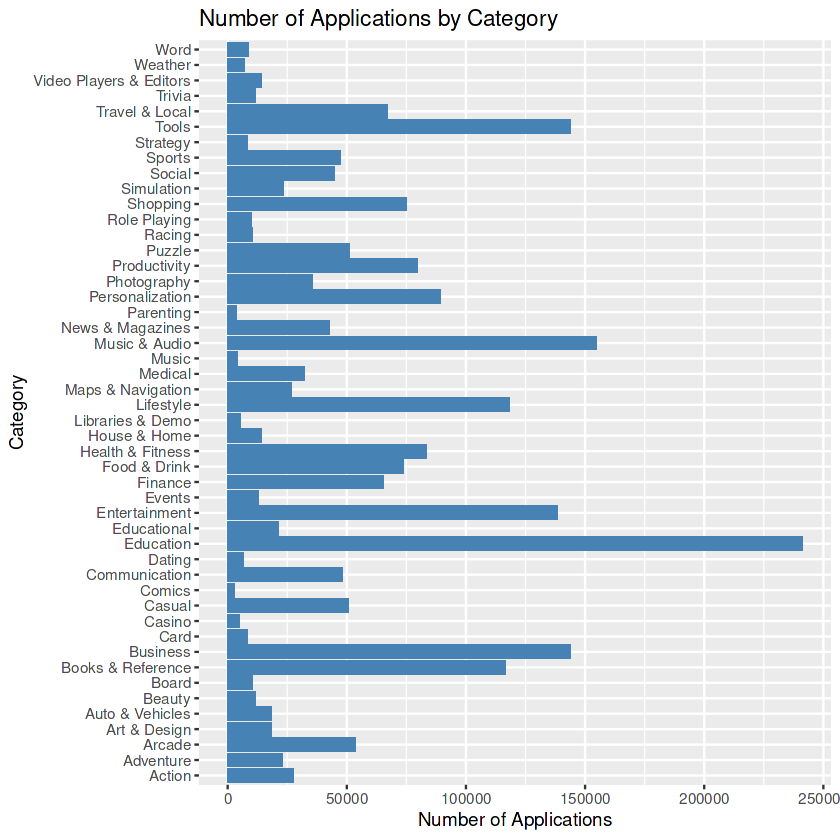

In [11]:
# Create a bar plot of number of applications by category
ggplot(data = dataset, aes(x = Category)) +
  geom_bar(fill = "steelblue") +
  labs(x = "Category", y = "Number of Applications") +
  ggtitle("Number of Applications by Category") +
  coord_flip()

We can see that the categories more developed are Education, Music & Audio, Tools and Business, Entertainment

#### Show comparation of aplicatios free vs paid by category

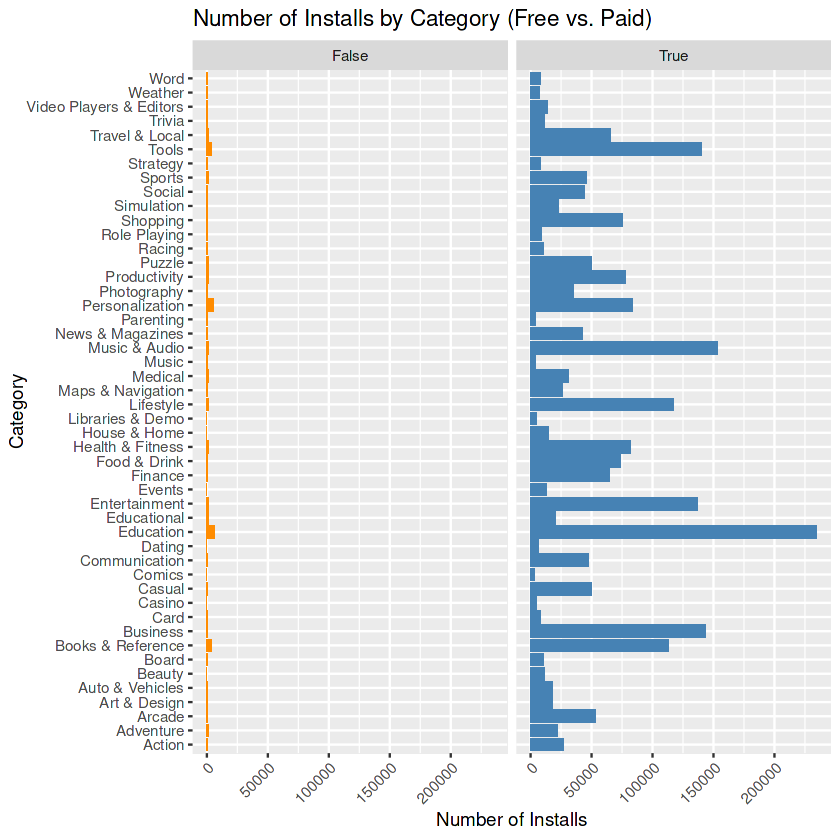

In [12]:
# Create a subset for Free = True
free_true <- subset(dataset, Free == "True")

# Create a subset for Free = False
free_false <- subset(dataset, Free == "False")

# Plot the number of installs by category for Free = True and Free = False
ggplot() +
  geom_bar(data = free_true, aes(x = Category), fill = "steelblue") +
  geom_bar(data = free_false, aes(x = Category), fill = "darkorange") +
  labs(x = "Category", y = "Number of Installs") +
  ggtitle("Number of Installs by Category (Free vs. Paid)") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  coord_flip() +
  facet_wrap(~ Free, nrow = 1)

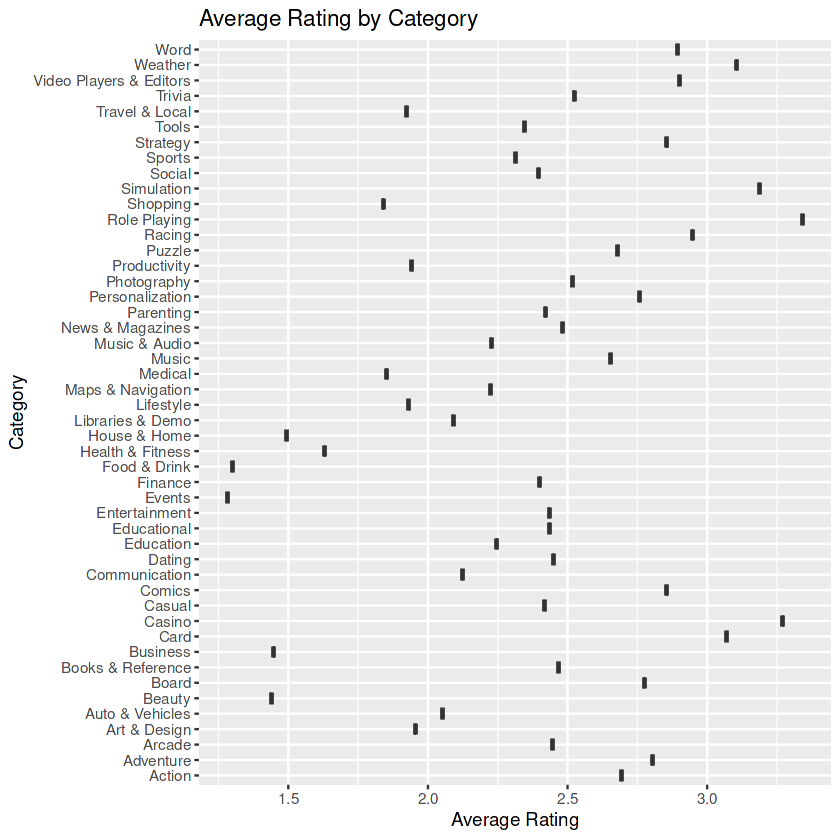

In [13]:
# Calculate average rating by category
avg_rating <- aggregate(Rating ~ Category, data = dataset, FUN = mean)

# Create a box plot
ggplot(data = avg_rating, aes(x = Category, y = Rating)) +
  geom_boxplot(fill = "steelblue") +
  xlab("Category") +
  ylab("Average Rating") +
  ggtitle("Average Rating by Category") +
  coord_flip()

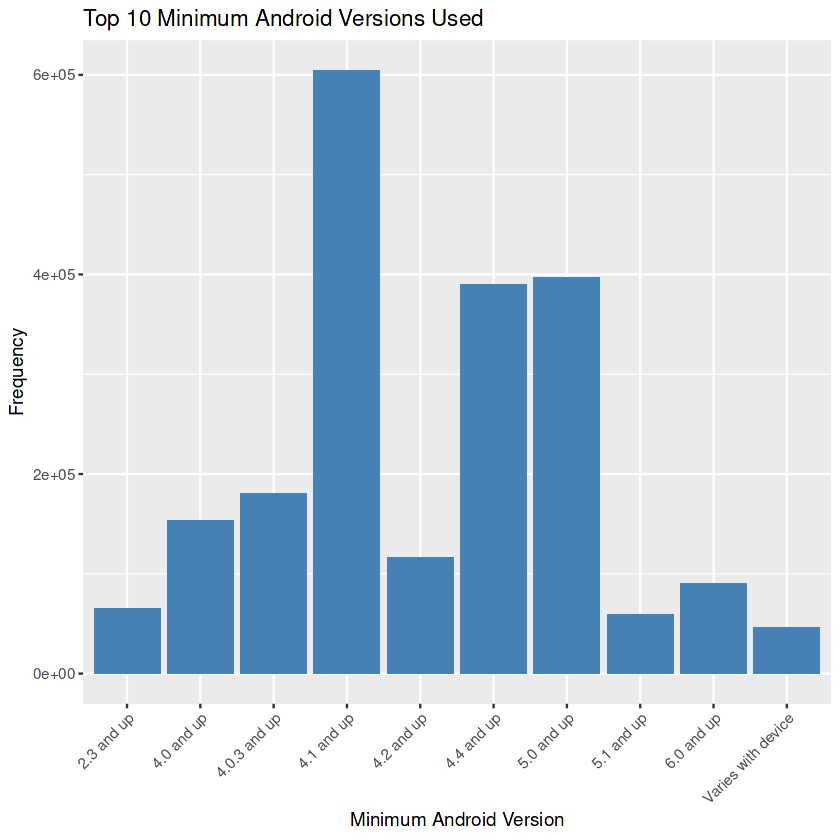

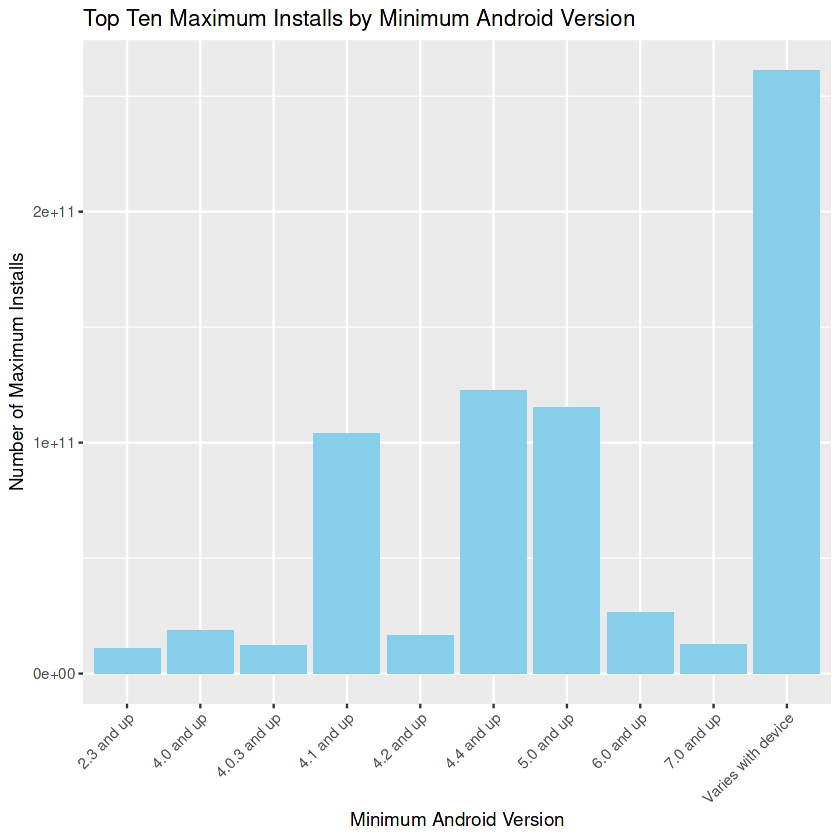

In [34]:
# Calculate the frequency of each Minimum.Android version
version_counts <- table(dataset$Minimum.Android)

# Sort the versions in descending order of frequency and select the top 10
top_versions <- head(sort(version_counts, decreasing = TRUE), 10)

# Create a data frame for the top 10 versions
top_versions_df <- data.frame(Version = names(top_versions), Frequency = as.numeric(top_versions))

# Create the bar plot
ggplot(data = top_versions_df, aes(x = Version, y = Frequency)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  xlab("Minimum Android Version") +
  ylab("Frequency") +
  ggtitle("Top 10 Minimum Android Versions Used") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Filter the data for non-missing values in Minimum.Android and Maximum.Installs columns
filtered_data <- dataset[!is.na(dataset$Minimum.Android) & !is.na(dataset$Maximum.Installs), ]

# Group the data by Minimum.Android and calculate the sum of Maximum.Installs
grouped_data <- aggregate(Maximum.Installs ~ Minimum.Android, data = filtered_data, FUN = sum)

# Sort the data by the sum of Maximum.Installs in descending order
sorted_data <- grouped_data[order(grouped_data$Maximum.Installs, decreasing = TRUE), ]

# Select the top ten rows
top_ten_data <- head(sorted_data, 10)

# Plot the bar chart
ggplot(data = top_ten_data, aes(x = Minimum.Android, y = Maximum.Installs)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  xlab("Minimum Android Version") +
  ylab("Number of Maximum Installs") +
  ggtitle("Top Ten Maximum Installs by Minimum Android Version") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


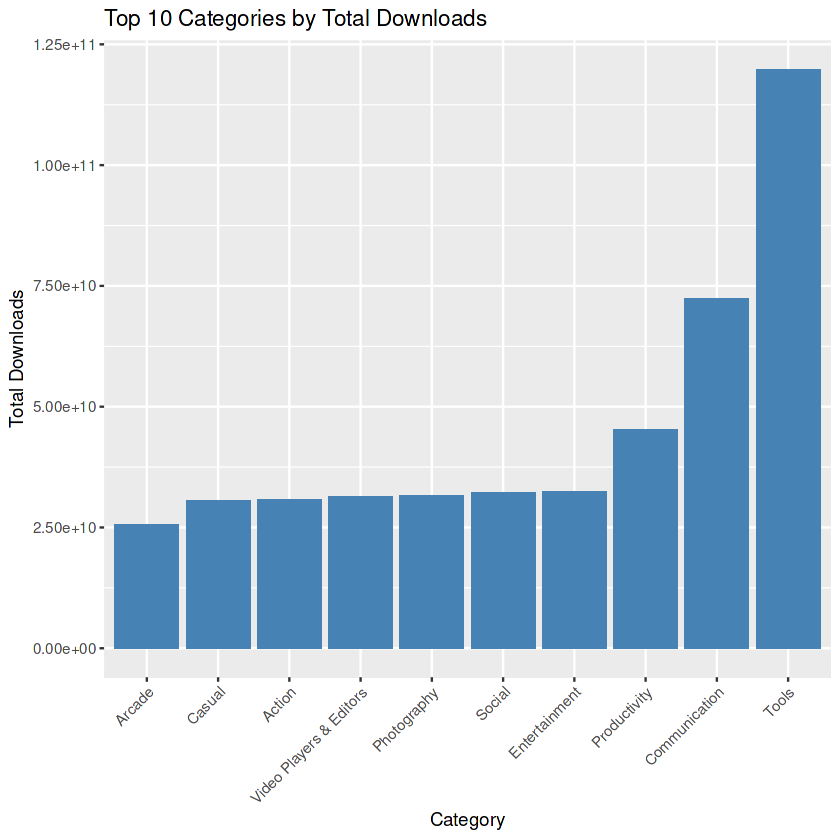

In [15]:
# Calculate the total downloads by category
downloads_by_category <- aggregate(dataset$Maximum.Installs, by = list(Category = dataset$Category), sum)
downloads_by_category <- downloads_by_category[order(downloads_by_category$x, decreasing = TRUE), ]

# Select the top 10 categories
top_categories <- head(downloads_by_category, 10)

# Create the bar plot
ggplot(data = top_categories, aes(x = reorder(Category, x), y = x)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  xlab("Category") +
  ylab("Total Downloads") +
  ggtitle("Top 10 Categories by Total Downloads") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability

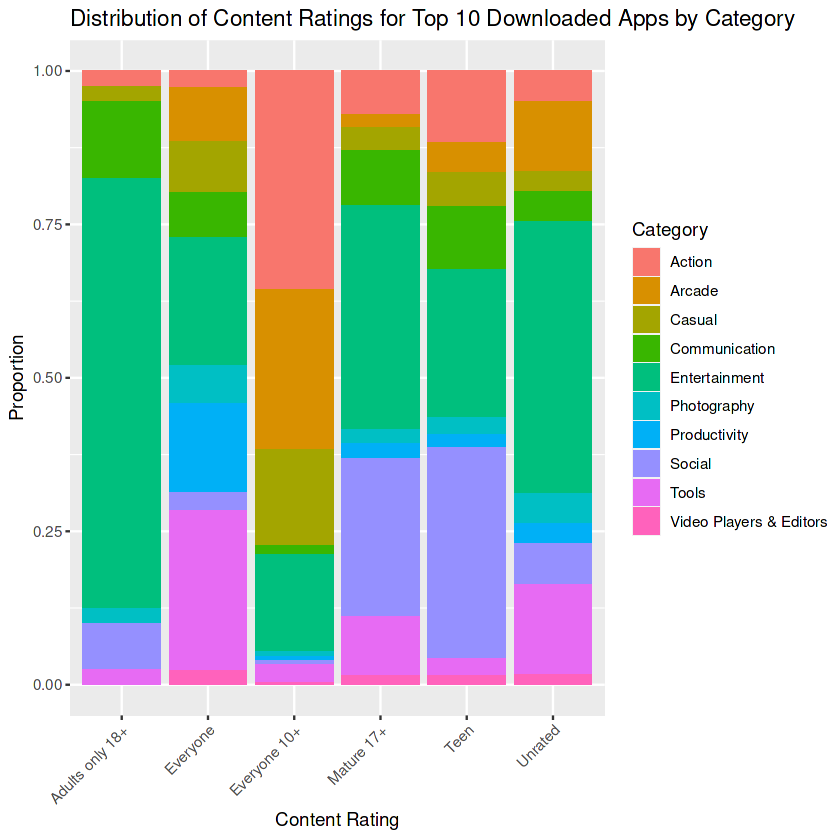

In [21]:
# Select the top 10 categories
top_categories <- head(downloads_by_category, 10)

# Filter the playstore dataset for the top 10 categories
top_apps <- subset(dataset, Category %in% top_categories$Category)

# Create the bar chart
ggplot(data = top_apps, aes(x = Content.Rating, fill = Category)) +
  geom_bar(position = "fill") +
  xlab("Content Rating") +
  ylab("Proportion") +
  ggtitle("Distribution of Content Ratings for Top 10 Downloaded Apps by Category") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  

### Conclusiones
1.- Analizando los datos hemos obtenido información intersante sobre que tipo de aplicaciones han sido mas desarrolladas,las aplicaciones instaladas por categoria,las aplicaciones mas valoradas por categoria,que version de android usa la mayoria de aplicaciones, que tipo de aplicaciones son las mas descargadas y hacia quien va dirigidas las mayoria de las aplicaciones.


2.- Los resultados nos indican que los tips para desarrollar una aplicación exitosa son:
    La version de Android de la mayoria de aplicaciones deberia ser compatible desde Android 4.4.
    Dado que hay mas aplicaciones de paga que se instalan mas se debe considerar entrar en este mercado pero en el ambito de la educación.
    Las aplicaciones mas descargadas son las de categoria Herramientas, Comunicacion y Productividad por lo que se podria tambien apuntar hacia    alla el nicho de mercado.
    Tambien oro dato interesante es que podemos observar que la mayoria de aplicaciones,en las categorias mas descargadas van dirigidas hacia Todas las edades y Adultos, por lo que tambien se podria dirigir el target a estas edades
    

Ancetedentes, Metodologia, Resultados, Conclusiones, Mostrar primero resultados en el video